# Regresión Polinomial

<p style='text-align: justify;'>A pesar de que los modelos lineales son muy fáciles de interpretar, pueden llegar a presentar limitaciones en la predicción de los valores esperados en la variable dependiente, esto es consecuencia de que suponer un modelo lineal para la relación entre variables puede llegar a ser una aproximación muy simple.</p>
<p style='text-align: justify;'>La regresión polinomial es un método que permite disminuir la condición de linealidad manteniendo al mismo tiempo una interpretabilidad alta. Este modelo añade curvatura al elevar la variable _x_ a diferentes potencias. De esta manera, se pueden conseguir diferentes funciones que representan y se ajustan más a la distribución de los datos.</p>

### Ejemplo de regresión polinomial
<p style='text-align: justify;'>En nuestro siguiente ejemplo se presentan siete puntos diferentes graficados en un plano cartesiano de dos dimensiones. Si se cuenta con bases de matemáticas o de geometría analítica al momento de observar los puntos en la gráfica es posible identificar inmediatamente que existe una tendencia en el comportamiento de los puntos muy parecida a la forma de una parábola.</p>
<center><img src="img/RegPol_Datos.png" width = "100%"></center>
<p style='text-align: justify;'>En nuestro ejemplo encontraremos la ecuación cuadrática correspondiente a la regresión polinomial de segundo grado que se aproxime al comportamiento de los puntos graficados.</p>

<p style='text-align: justify;'>El procedimiento para generar la regresión cuadrática utilizando la técnica de ajuste de mínimos cuadrados inicia construyendo un sistema de ecuaciones que son producto de analizar la suma de los cuadrados de los residuos (ecuación siguiente).</p> 
<br>
$$s_r=\sum_{i=1}^n (y_i-a_0-a_1x_i-a_2x_i^2)^2$$
<p style='text-align: justify;'>Utilizando el concepto de derivadas parciales en conjunto con algebra es posible encontrar las constantes que acompañaran a las tres variables $a_{0}$, $a_{1}$ y $a_{2}$ en el sistema de ecuaciones algebraicas tres por tres. Pero no te preocupes nuestro curso no es un curso de matemáticas, para este ejemplo hemos simplificado las ecuaciones de una manera sencilla y comprensiva, tal como se muestra en el recuadro amarillo a continuación.</p>
<center><img src="img/RegPol_Formulas.png" width = "80%"></center>

<p style='text-align: justify;'>En las ecuaciones del recuadro amarillo se involucran múltiples sumatorias que pueden hacer que estas ecuaciones se vean impactantes o complejas, pero con la finalidad de que este ejemplo sea más sencillo de entender, aún para las personas que no cuentan con tantas bases de matemáticas, realizamos cada una de las sumatorias de forma independiente en la siguiente tabla.</p> 
<br>
<center><img src="img/RegPol_Calculos1.png" width = "80%"></center>
<p style='text-align: justify;'>Al sustituir los valores obtenidos en cada una de las sumatorias en las ecuaciones del recuadro amarillo, se obtiene un sistema de ecuaciones algebraicas que se pueden resolver por múltiples métodos con lo que se obtienen los valores de cada una de las tres variables, como se muestra en la siguiente tabla.</p> 
<br>
<center><img src="img/RegPol_Calculos2.png" width = "70%"></center>

<p style='text-align: justify;'>Asignándole múltiples valores de la variable "<i>x</i>" a nuestra ecuación de la regresión cuadratica, es posible construir una tabla y una parabola que se comporta de manera similar a los puntos con los que iniciamos. En la siguiente figura se observan la tabla y la gráfica correspondientes a la ecuación: </p>
<br>
$$y=1.107x^2+x+0.571$$
<br>
<center><img src="img/RegPol_Predic.png" width = "100%"></center>

<p style='text-align: justify;'>Al momento de juntar la gráfica de los valores originales con la gráfica de nuestra parábola construida utilizando la ecuación de la regresión cuadrática, es posible observar que la ecuación que encontramos tiene un comportamiento similar a los puntos originales, pero no abarca en su totalidad a los puntos. Los modelos de regresión solamente se aproximan a los datos, generando ecuaciones que nos permiten predecir qué valor de la variable dependiente <i>y</i> se obtendrá incluso para valores de <i>x</i> que nunca antes se han presentado.</p>
<center><img src="img/RegPol_Compara.png" width = "70%"></center>

In [12]:
from sklearn.datasets import load_boston

# Cargamos un conjunto de datos
boston_dataset = load_boston()
# Se carga con pandas para tratamiento posterior
import pandas as pd
df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
# Agregamos la variable de respuesta
df['MEDV'] = boston_dataset.target[df.index]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df.corr()["MEDV"].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [14]:
## Regresión con una variable

In [15]:
# Preparamos datos
X = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

In [22]:
# Creamos un split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=100)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Utilizamos la libreria PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [29]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# Creando el modelo y entrenando
reg = LinearRegression().fit(X_train_poly,y_train)
# Prediciendo valores de entrenamiento
y_train_hat = reg.predict(X_train_poly)
# Prediciendo valores de validación
y_test_hat = reg.predict(X_test_poly)

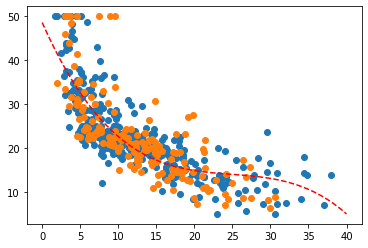

In [30]:
import matplotlib.pyplot as plt
import numpy as np
# Le decimos a jupyter que grafique en  el cuaderno
%matplotlib inline
# Creamos un scatter plot con los datos de entrenamiento
plt.scatter(X_train, y_train)
# Creamos un scatter plot con los datos de validación
plt.scatter(X_test, y_test)
# En X_plot guardamos valores distribuidos entre 0 y 40
X_plot = np.linspace(0,40).reshape(-1, 1)
# Con el modelo predecimos X_plot
X_plot_poly = poly.fit_transform(X_plot)
y_plot = reg.predict(X_plot_poly)
# Graficamos el modelo
plt.plot(X_plot, y_plot,"r--")

In [31]:
from sklearn.metrics import r2_score
# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.682052397497773
Prueba 0.6150559372890204


In [32]:
# Preparación de datos iniciales
X = df[["LSTAT"]]
y = df["MEDV"].values.reshape(-1, 1)

# Hacemos un split de 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Se procesan los polinomios
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Se entrena el modelo
reg = LinearRegression().fit(X_train_poly,y_train)

# Prediciendo valores de entrenamiento
y_train_hat = reg.predict(X_train_poly)
# Prediciendo valores de validación
y_test_hat = reg.predict(X_test_poly)

# Calculamos el error
print("Entrenamiento", r2_score(y_train, y_train_hat))
print("Prueba", r2_score(y_test, y_test_hat))

Entrenamiento 0.6607355856920534
Prueba 0.6057480327377572
